<a href="https://colab.research.google.com/github/HarshiniVenkat/Machine-Deep-Learning/blob/master/CNN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


60,000 training samples each of 28 x 28 dimension

In [4]:
classes = np.unique(train_Y)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

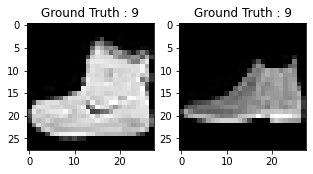

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121) #subplot(mnp) (rows,colums,pic position)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [7]:
train_X = train_X.reshape(-1, 28,28, 1) # -1 represents the value 'n'
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
type(train_X)

numpy.ndarray

Data Preprocessing Begins:

In [0]:
#convert the dtype from int8 to float32
#rescale the value of pixels between 0-1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
#In one-hot encoding, you convert the categorical data into a vector of numbers so that the ML algorithm can understand it better

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
#test_size=0.2 is 20% allocation for testing
#random_state=13 for changing the train and test values for every iteration

In [12]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

three convolutional layers:

The first layer will have 32-3 x 3 filters,

The second layer will have 64-3 x 3 filters and

The third layer will have 128-3 x 3 filters.

 there are three max-pooling layers each of size 2 x 2.


In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
fashion_model = Sequential() #adding a sequential model
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same')) #padding--> so that the o/p volume matches the i/p module
#'linear' activation for regression and 'softmax' for classification
fashion_model.add(LeakyReLU(alpha=0.1)) #f(x)=a*x
fashion_model.add(MaxPooling2D((2, 2),padding='same')) #MaxPooling to reduce the image size

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten()) #convert to a single Matrix to the last layer

fashion_model.add(Dense(128, activation='linear')) #last before layer
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [16]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#cross entropy loss ==> predicts probability of how far the value is from the correct output. If the value is near 1, greater the error

In [18]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
#verbose = 1 indicates the progress bar     
#validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.4688 - accuracy: 0.8303 - val_loss: 0.3334 - val_accuracy: 0.8773
Epoch 2/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2871 - accuracy: 0.8957 - val_loss: 0.2760 - val_accuracy: 0.8996
Epoch 3/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2394 - accuracy: 0.9112 - val_loss: 0.2377 - val_accuracy: 0.9127
Epoch 4/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2057 - accuracy: 0.9244 - val_loss: 0.2258 - val_accuracy: 0.9188
Epoch 5/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.1781 - accuracy: 0.9338 - val_loss: 0.2304 - val_accuracy: 0.9187
Epoch 6/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.1563 - accuracy: 0.9418 - val_loss: 0.2213 - val_accuracy: 0.9221
Epoch 7/20
48000/48000 [==============================] - 85s 2ms/st

In [0]:
fashion_model.save("fashion_model_nodropout.h5py")

In [0]:
from keras.models import load_model
fashion_train = load_model('fashion_model_nodropout.h5py')
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
#evaluate(test, target, verbose)

In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.444869379586447
Test accuracy: 0.9205999970436096


In [0]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Adding DropOut to the layer

batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25)) #fraction of the i/p units to drop

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))

fashion_model.add(Dense(num_classes, activation='softmax'))

In [24]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [29]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.1674 - accuracy: 0.9357 - val_loss: 0.2108 - val_accuracy: 0.9297
Epoch 2/20
48000/48000 [==============================] - 94s 2ms/step - loss: 0.1653 - accuracy: 0.9368 - val_loss: 0.2130 - val_accuracy: 0.9317
Epoch 3/20
48000/48000 [==============================] - 94s 2ms/step - loss: 0.1655 - accuracy: 0.9361 - val_loss: 0.2191 - val_accuracy: 0.9288
Epoch 4/20
48000/48000 [==============================] - 94s 2ms/step - loss: 0.1647 - accuracy: 0.9372 - val_loss: 0.2207 - val_accuracy: 0.9312
Epoch 5/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.1668 - accuracy: 0.9372 - val_loss: 0.2149 - val_accuracy: 0.9282
Epoch 6/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.1645 - accuracy: 0.9382 - val_loss: 0.2138 - val_accuracy: 0.9283
Epoch 7/20
48000/48000 [==============================] - 95s 2ms/st

In [0]:
fashion_model.save("fashion_model_dropout.h5py")

In [31]:
from keras.models import load_model
fashion_model_dropout = load_model('fashion_model_dropout.h5py')
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 6s 585us/step


In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21960550896152853
Test accuracy: 0.9261000156402588


In [0]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Prediction Part
predicted_classes = fashion_model.predict(test_X)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
#np.argmax(): to select the index number which has a higher value in a row.
# one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1

In [36]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

In [37]:
correct = np.where(predicted_classes==test_Y)[0] #np.where()[0] ==> list of elements which meet the condition in the array
print ("Found %d correct labels" %len(correct)) 

Found 9242 correct labels


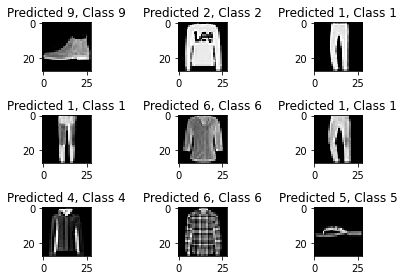

In [38]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 758 incorrect labels


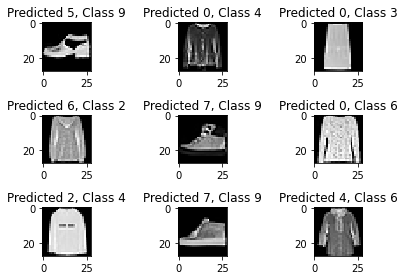

In [39]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" %len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [40]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.89      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.90      0.89      1000
     Class 3       0.92      0.93      0.93      1000
     Class 4       0.91      0.86      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.81      0.78      0.79      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

